# 앤스콤 데이터 집합 불러오기 - 평균,분산,상관관계,회귀선 전부 같지만 구성이다른경우!!
## 앤스콤 4분할그래프(평균,분산 등의 상관관계 및 회귀분석)

In [43]:
import seaborn as sns

anscombe_ex = sns.load_dataset("anscombe")
#anscombe_ex는 데이터프레임 , dataset이 데이터 그룹 분류기준
print(anscombe_ex)
print(type(anscombe_ex)) 
# 'dataset' 열을 기준으로 그룹화하고, 'y' 열의 평균과 표준편차를 계산합니다.
grouped_stats = anscombe_ex.groupby('dataset')['y'].agg(['mean', 'std'])
print(grouped_stats)
# dataset별 y 열의 평균을 계산
mean_y = anscombe_ex.groupby('dataset')['y'].mean()

# dataset별 y 열의 표준편차를 계산
std_y = anscombe_ex.groupby('dataset')['y'].std()
print(mean_y)
print(std_y)

print(type(grouped_stats))
print(type(mean_y))


   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

# matplotlib 라이브러리로 간단한 그래프 그리기

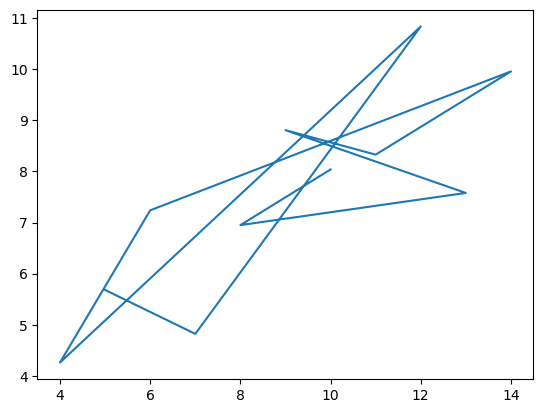

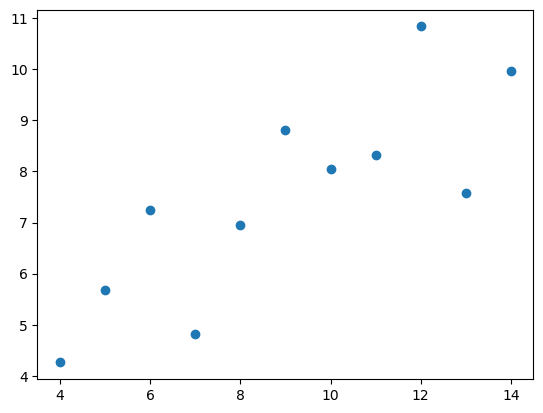

In [12]:
#Jupyter Notebook에서 인터랙티브(interactive)한 그래프를 생성하는 매직 커맨드, 사용자가 직접 조작
#그래프를 정적 이미지로 보여줄지(inline), 아니면 상호작용 가능한 형태로 보여줄지(notebook)를 결정
%matplotlib inline
#따라서 import는 위 설정과 무관하게 반드시 해야함!
#그중 pyplot은 matlab과 유사한 환경+그래프 관련
import matplotlib.pyplot as plt

dataset_1=anscombe_ex[anscombe_ex['dataset']=='I']

#선 그래프
plt.plot(dataset_1['x'],dataset_1['y'])

plt.show()

#점 그래프
plt.plot(dataset_1['x'],dataset_1['y'],'o')

plt.show()



# 한 번에 4개의 그래프 그리기

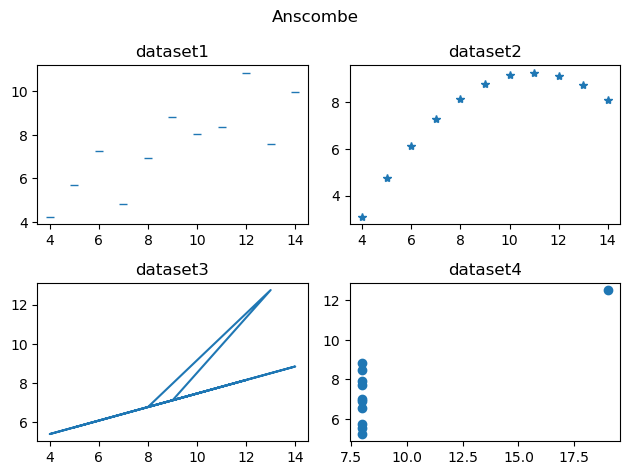

In [35]:
dataset_2= anscombe_ex[anscombe_ex['dataset']=='II']
dataset_3= anscombe_ex[anscombe_ex['dataset']=='III']
dataset_4= anscombe_ex[anscombe_ex['dataset']=='IV']

#격자 기본틀
fig=plt.figure()

#그래프격자 할당 subplot(행크기,열크기,왼쪽위부터시작 1 2 \n 3 4)
axis1=fig.add_subplot(2,2,1)
axis2=fig.add_subplot(2,2,2)
axis3=fig.add_subplot(2,2,3)
axis4=fig.add_subplot(2,2,4)

#데이터 입력 및 스타일
axis1.plot(dataset_1['x'],dataset_1['y'],'_')
axis2.plot(dataset_2['x'],dataset_2['y'],'*')
axis3.plot(dataset_3['x'],dataset_3['y'])
axis4.plot(dataset_4['x'],dataset_4['y'],'o')

#격자별 제목
axis1.set_title("dataset1")
axis2.set_title("dataset2")
axis3.set_title("dataset3")
axis4.set_title("dataset4")
#전체제목
fig.suptitle("Anscombe")

#겹치는경우방지
fig.tight_layout()

plt.show()
#plt.show()는 현재 그림(figure)을 화면에 표시한 다음 그 그림을 닫아버리기 때문에, 더 이상 그림에 어떤 변경도 할 수 없다.
#따라서 전부작성을 하고 마지막으로 볼 결과에 plt.show()작성

# 기초 그래프 그리기 - 히스토그램, 산점도, 박스 그래프

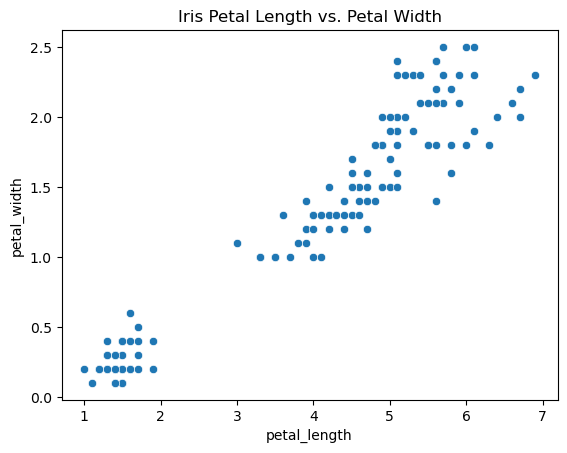

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn에 내장된 데이터셋 중 하나를 불러옵니다.
iris = sns.load_dataset('iris')

# 'petal_length'와 'petal_width'의 관계를 산점도로 그립니다. (데이터프레임, x축데이터, y축데이터) ->기본적으로 그 컬럼 이름을 축 라벨로 사용합니다
sns.scatterplot(data=iris, x='petal_length', y='petal_width')

plt.title("Iris Petal Length vs. Petal Width")
plt.show()

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
<class 'pandas.core.frame.DataFrame'>


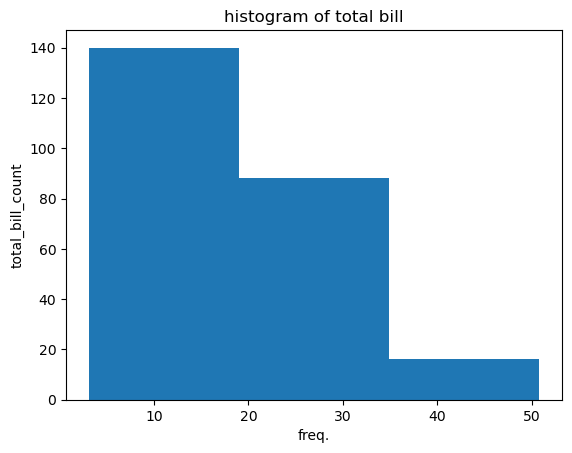

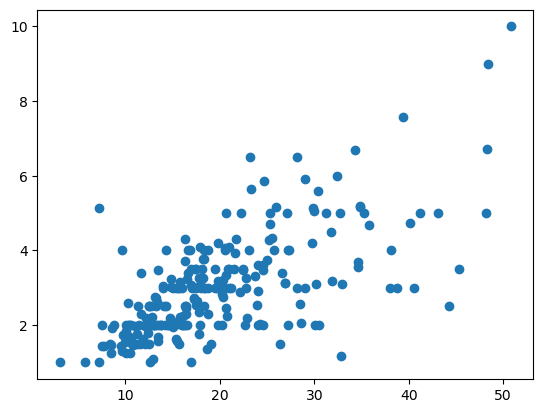

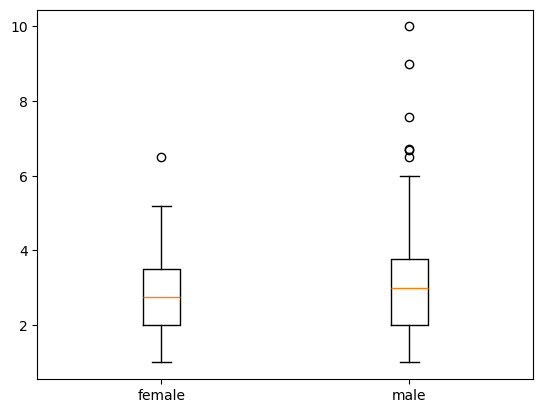

In [55]:
tips=sns.load_dataset("tips")
print(tips.head(n=2))
print(type(tips))
fig=plt.figure()
axis1=fig.add_subplot(1,1,1)

#히스토그램형식 , bins는 바 개수(인자 개수) , x,y축이름 인자를 직접 넣어야함!
axis1.hist(tips['total_bill'], bins=3)
axis1.set_title('histogram of total bill')
axis1.set_xlabel('freq.')
axis1.set_ylabel('total_bill_count')

#산점도 형식
scattering=plt.figure()
axis2=scattering.add_subplot(1,1,1)
axis2.scatter(tips['total_bill'],tips['tip'])

#박스그래프 형식
boxplot=plt.figure()
axis3=boxplot.add_subplot(1,1,1)
axis3.boxplot([tips[tips['sex']=='Female']['tip'],tips[tips['sex']=='Male']['tip']],tick_labels=['female','male'])
plt.show()

# 단변량 그래프 그리기 - 히스토그램

# 다변량 그래프 그리기

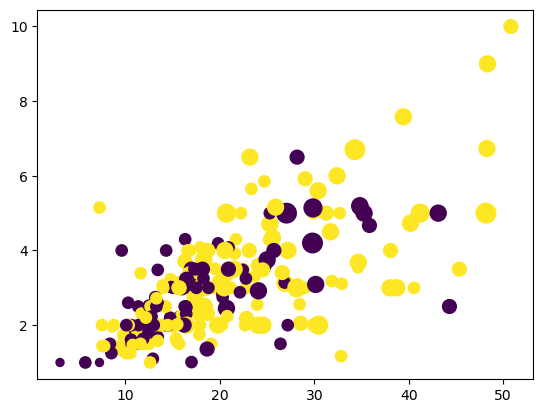

In [66]:
#ex 지불금액+성별(두가지변량)별 팁
#문자열을 색상지정할수없기에 숫자 값으로 변환하는 함수
def recode_sex(sex):
    if sex=='Female':
        return 0
    else:
        return 1
#숫자 값을 데이터프레임 열에 추가 (by apply를 활용한 브로드캐스팅)
tips['sex_color']=tips['sex'].apply(recode_sex)
#테이블인원수에따라 점의크기도 다르게 s=점사이즈, c=색상, alpha=투명도 
scatter_plot=plt.figure()
axis1=scatter_plot.add_subplot(1,1,1)
axis1.scatter(x=tips['total_bill'],y=tips['tip'],s=tips['size']*33,c=tips['sex_color'],alpha=1)
plt.show()

# 데이터프레임과 시리즈로 그래프 그리기
## 직접 바로 지정하여 그리기때문에 간편

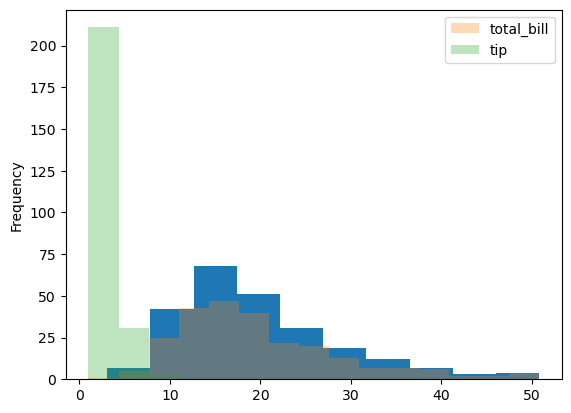

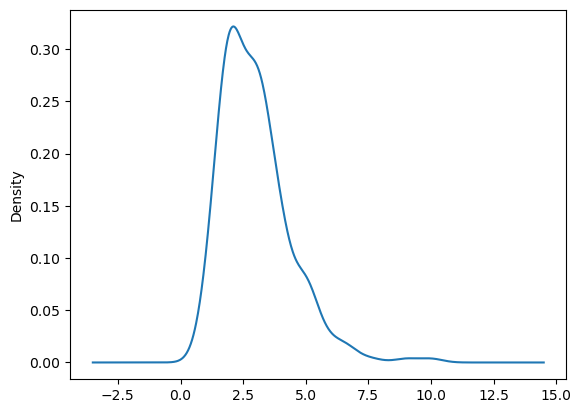

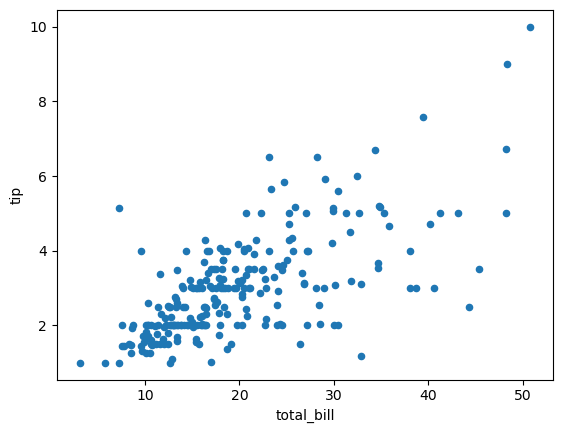

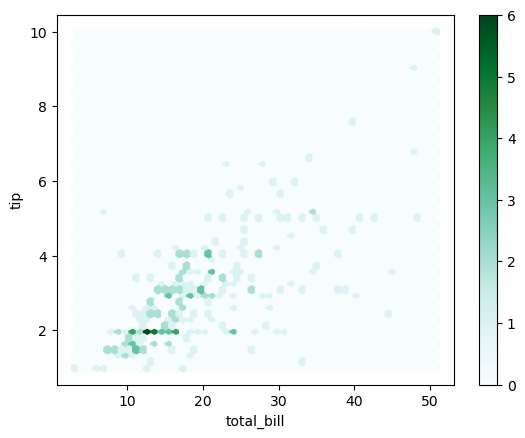

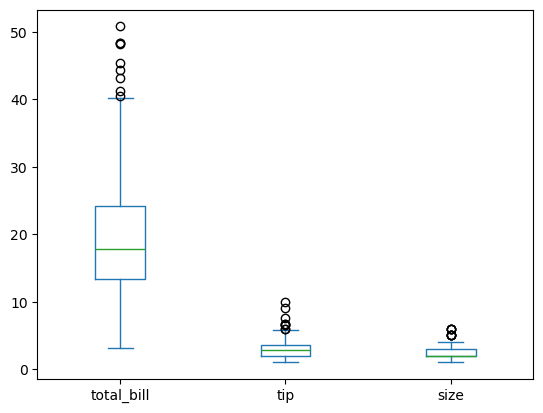

In [87]:
ax=plt.subplots()
ax=tips['total_bill'].plot.hist()
#ax=ax -> 기존객체에 추가하기
ax= tips[['total_bill','tip']].plot.hist(alpha=0.3,bins=15,ax=ax)
ax=plt.subplots()

#밀집도 (단일변수)
ax=tips['tip'].plot.kde()
#산점도 (2개변수+a)
ax=tips.plot.scatter(x='total_bill',y='tip')
#hexbin (2개변수)
ax=tips.plot.hexbin(x='total_bill',y='tip',gridsize=50)
#박스그래프
ax=tips.plot.box()



plt.show()

# 알아두면 좋아요

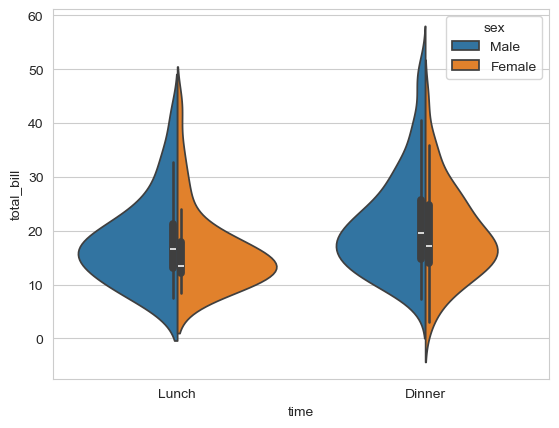

In [91]:
fig,ax=plt.subplots()
sns.set_style('whitegrid') #style을 먼저 적용해야함!
ax=sns.violinplot(x='time',y='total_bill',hue='sex',data=tips,split=True)

plt.show()